# Building Your First Neural Network: A Hands-On Tutorial

## Predict Land Price 

### Example Dataset
| Area| Distance From City | Price |
| --- | --- | --- |
| 10 | 5 | 100 |
| 15 | 1 | 200 |
| 5 | 1 | 50 |
| 20 | 3 | 500 |
| 20 | 5 | 450 |
| 20 | 10 | 400 |
| 20 | 7 | 430 |
| 20 | 13 | 350 |
| 20 | 15 | 300 |
| 15 | 5 | 200 |
| 20 | 5 | 300 |
| 25 | 5 | 600 |

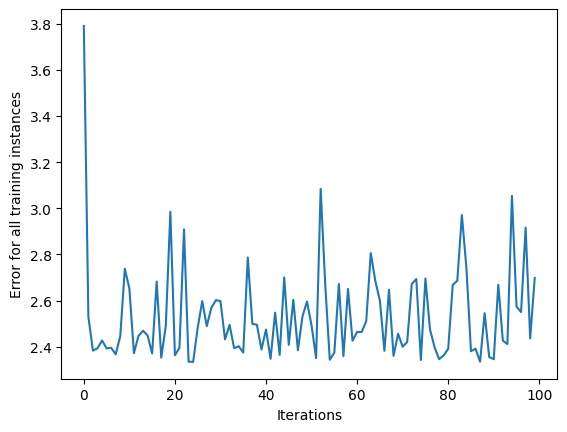

In [83]:
import numpy as np
import matplotlib.pyplot as plt
class NeuralNetwork:
    def __init__(self, learning_rate):
        # Initialize the weights and bias of the neural network randomly
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        # Set the learning rate for the neural network
        self.learning_rate = learning_rate
    
    def dot_product(self, input_vector):
        return np.dot(input_vector, self.weights)
    
    def add_bias(self, dot_product_result):
        return dot_product_result + self.bias
    
    def sigmoid_function(self, add_bias_result):
        return 1 / (1 + np.exp(-add_bias_result))
    
    def derivative_mean_square_error(self, sigmoid_function_result, target):
        return 2 * (sigmoid_function_result - target)
    
    def derivative_sigmoid(self, sigmoid_function_result):
        return sigmoid_function_result * (1 - sigmoid_function_result)
    
    def derivative_weight(self, input_vector):
        return (0 * self.weights) + (1 * input_vector)
    
    def get_prediction(self, input_vector):
        # Compute the weighted sum of the inputs and add the bias
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        # Apply the sigmoid activation function to the result
        layer_2 = self.sigmoid_function(layer_1)
        # The output of the neural network is the final layer
        prediction = layer_2
        return prediction
    
    def _compute_gradients(self, input_vector, target):
        layer_1 = self.add_bias(self.dot_product(input_vector))
        layer2 = self.sigmoid_function(layer_1)
        d_mean_square_error = self.derivative_mean_square_error(layer2, target)
        d_sigmoid = self.derivative_sigmoid(layer2)
        d_bias = 1
        d_weight = self.derivative_weight(input_vector)
        
        d_error_dbias = (
            d_mean_square_error * d_sigmoid * d_bias
        )
        # Compute the derivative of the error with respect to the weights
        d_error_dweights = (
            d_mean_square_error * d_sigmoid * d_weight
        )
        
        return d_error_dbias, d_error_dweights
    
    def update_bias_weight(self, d_error_dbias, d_error_dweights):
        # Update the bias using the derivative of the error with respect to the bias and the learning rate
        self.bias = self.bias - (d_error_dbias * self.learning_rate)
        # Update the weights using the derivative of the error with respect to the weights and the learning rate
        self.weights = self.weights - (d_error_dweights * self.learning_rate)
        
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            random_data_index = np.random.randint(len(input_vectors))
            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]
            d_error_dbias, d_error_dweights = self._compute_gradients(
                input_vector, target
            )
            self.update_bias_weight(d_error_dbias, d_error_dweights)
            
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.get_prediction(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)
        
        return cumulative_errors
    
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
        [2, 2],
        [2, 2],
        [2, 2],
        [2, 2]
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

In [81]:
input_vector = np.array([2, 2])
neural_network.get_prediction(input_vector)

0.8950174501208746